Question 6: Implementing a Custom Cross-Validation Loop<br>
Task: Write a custom cross-validation loop for a Support Vector Machine model with varying 'C' parameter and plot the results.

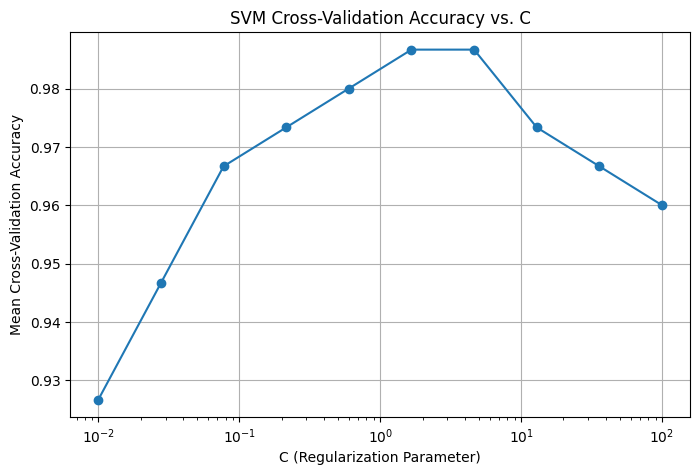

In [2]:
# Custom cross-validation loop for SVM with varying 'C' parameter and plot the results

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Define range of C values to test
C_values = np.logspace(-2, 2, 10)
mean_accuracies = []

# Custom 5-fold cross-validation loop
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for C in C_values:
    fold_accuracies = []
    for train_idx, val_idx in skf.split(X, y):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        model = SVC(C=C, kernel='linear', random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        acc = accuracy_score(y_val, y_pred)
        fold_accuracies.append(acc)
    mean_accuracies.append(np.mean(fold_accuracies))

# Plot results
plt.figure(figsize=(8, 5))
plt.semilogx(C_values, mean_accuracies, marker='o')
plt.xlabel("C (Regularization Parameter)")
plt.ylabel("Mean Cross-Validation Accuracy")
plt.title("SVM Cross-Validation Accuracy vs. C")
plt.grid(True)
plt.show()